Iteration 0: Cost = 102.28501723438217, theta_0 = 0.13059808015534485, theta_1 = 0.8204962919108859
Iteration 100: Cost = 1.1302772119452267, theta_0 = 0.9927741406275578, theta_1 = 2.3034199659752868
Iteration 200: Cost = 0.8850526857919906, theta_0 = 1.4803074786416475, theta_1 = 2.230114364085578
Iteration 300: Cost = 0.7358718841145313, theta_0 = 1.8605658947152681, theta_1 = 2.1729386390829566
Iteration 400: Cost = 0.6451186795381557, theta_0 = 2.1571537415768085, theta_1 = 2.1283436361731662
Iteration 500: Cost = 0.5899095370193431, theta_0 = 2.3884815628364815, theta_1 = 2.0935611426510823
Iteration 600: Cost = 0.556323401610788, theta_0 = 2.56890891835698, theta_1 = 2.066432052468912
Iteration 700: Cost = 0.5358914868912742, theta_0 = 2.709635746815621, theta_1 = 2.045272340798298
Iteration 800: Cost = 0.5234618597839191, theta_0 = 2.8193975963472324, theta_1 = 2.0287685290236657
Iteration 900: Cost = 0.5159003741302847, theta_0 = 2.9050078793654466, theta_1 = 2.015896151208105

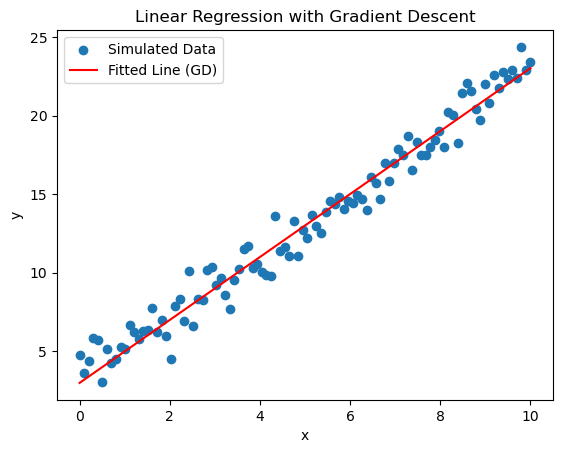

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some data
np.random.seed(0)
x = np.linspace(0, 10, 100)
true_slope = 2
true_intercept = 3
y_true = true_slope * x + true_intercept
noise = np.random.normal(0, 1, x.shape)
y_noisy = y_true + noise

# Parameters for Gradient Descent
alpha = 0.01  # Learning rate
num_iterations = 1000  # Number of iterations
m = len(x)  # Number of data points

# Initialize theta_0 (intercept) and theta_1 (slope) to random values
theta_0 = 0.0
theta_1 = 0.0

# Gradient Descent Loop
for i in range(num_iterations):
    # Predicted values based on current theta_0 and theta_1
    y_pred = theta_0 + theta_1 * x
    
    # Compute gradients
    d_theta_0 = (1/m) * np.sum(y_pred - y_noisy)  # Gradient w.r.t theta_0
    d_theta_1 = (1/m) * np.sum((y_pred - y_noisy) * x)  # Gradient w.r.t theta_1
    
    # Update parameters
    theta_0 = theta_0 - alpha * d_theta_0
    theta_1 = theta_1 - alpha * d_theta_1
    
    # Optionally, print progress every 100 iterations
    if i % 100 == 0:
        cost = (1/(2*m)) * np.sum((y_pred - y_noisy) ** 2)  # Cost function (MSE)
        print(f"Iteration {i}: Cost = {cost}, theta_0 = {theta_0}, theta_1 = {theta_1}")

# Final parameters after gradient descent
print(f"Final values: theta_0 = {theta_0}, theta_1 = {theta_1}")

# Plot the results
plt.scatter(x, y_noisy, label="Simulated Data")
plt.plot(x, theta_0 + theta_1 * x, color='red', label="Fitted Line (GD)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression with Gradient Descent")
plt.show()


In [19]:
import numpy as np
# Import math Library
import math

def g(x):
    g = np.math.factorial(x-1)
    return g

def studt(v, b):
    y = [g( (v+1) / 2 ) / ((v * math.pi)^(1/2))] * [1 + (b**2 / v)]^(-(v+1)/2)
    return y 

*Steps to write grad descent optimizer for pdf of students t distribution* 

- to effectively write an optimizer, we need to define a convex function 
- with a convex function, we can pursue a gradient of 0
- the function given is the pdf of the student's t distribution, which maps from real space to probability space (0-1)
- to make the function convex and monotonic we can take the negative log likelihood of it
- taking the logarithm of this function simplifies it:
    - the first term separates out to a constant and you are left with: log(studt) = const + ((v+1)/2) * log(1+((b**2)/v))

1. calculate partial derivative of the -log(studt) wrt v
2. calculate partial derivative of the -log(studt) wrt b


In [20]:
import numpy as np
# Import math Library
import math

def g(x):
    g = np.math.factorial(x-1)
    return g

def studt(v, b):
    y = [g( (v+1) / 2 ) / ((v * math.pi)^(1/2))] * [1 + (b**2 / v)]^(-(v+1)/2)
    return y 

# initialize values of variables
v = 3
b = 1

## define parameters of gradient descent
a = 0.001
steps = 1000

# write an optimizer and test
# to ensure this is a convex function, we can start by taking the logarithm
